<a href="https://colab.research.google.com/github/ABD-01/MNIST/blob/main/CNN%20Model/Pytorch_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

# Fashion MNIST

In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root = '/content/drive/MyDrive/Colab Notebooks/',
    download = True,
    train = True,
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
)
# Extraction and Transform

In [3]:
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=10
)
# Loading Data

In [4]:
torch.set_printoptions(linewidth=120)

In [5]:
print(train_set.train_labels)
print(train_set.train_labels.bincount())

tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [6]:
sample = next(iter(train_set))

In [7]:
image, label = sample

In [8]:
image.shape

torch.Size([1, 28, 28])

label 9


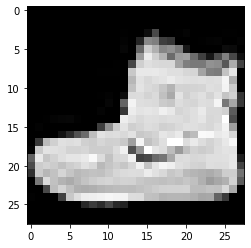

In [9]:
plt.imshow(image.squeeze(), cmap='gray')
print('label',label)

In [10]:
batch = next(iter(train_loader))

In [11]:
images, labels = batch

In [12]:
images.shape

torch.Size([10, 1, 28, 28])

In [13]:
labels.shape

torch.Size([10])

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


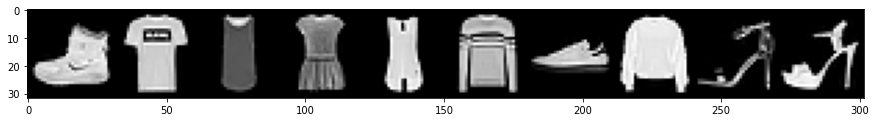

In [14]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('labels:', labels)

In [16]:
class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)   # kernel is refers to filter, out_channels = no. of filters
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

    self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)
    # linear, dense, fully connected refers same

  def forward(self, t):
    t = self.layer(t)
    return t

In [17]:
network = Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [19]:
network.conv1.weight

Parameter containing:
tensor([[[[-0.0620,  0.0437, -0.1655, -0.1881, -0.0900],
          [ 0.0775,  0.0665,  0.1467,  0.0644, -0.1107],
          [ 0.1450, -0.1194,  0.1389,  0.1201, -0.1778],
          [ 0.0348, -0.1147, -0.1730, -0.0018, -0.1494],
          [-0.0965,  0.1255,  0.1713,  0.0631,  0.1470]]],


        [[[ 0.0940,  0.0071,  0.0498,  0.0583,  0.0080],
          [-0.0469,  0.0908,  0.1341, -0.1073,  0.1201],
          [-0.0274,  0.1561, -0.0796, -0.1877,  0.1350],
          [ 0.0854,  0.1017,  0.1989, -0.0375,  0.0055],
          [-0.1283,  0.0954, -0.1666, -0.0533, -0.1422]]],


        [[[ 0.0189, -0.1458,  0.0442, -0.0238, -0.1316],
          [ 0.0243,  0.1316, -0.0020,  0.1348,  0.1357],
          [-0.1095,  0.1183, -0.0526,  0.0088,  0.1091],
          [ 0.0931,  0.0882,  0.0472, -0.0250, -0.0126],
          [ 0.0868,  0.0478, -0.1905, -0.0904,  0.0029]]],


        [[[-0.0106, -0.0053,  0.0765,  0.1507, -0.1665],
          [ 0.1158, -0.1527,  0.0960, -0.1041, -0.0695

In [20]:
network.conv1.weight.shape

torch.Size([6, 1, 5, 5])

In [21]:
network.conv1.bias.shape

torch.Size([6])

In [22]:
network.conv2.weight.shape

torch.Size([12, 6, 5, 5])

In [23]:
network.fc1.weight.shape

torch.Size([120, 192])

In [24]:
network.fc2.weight.shape

torch.Size([60, 120])

In [25]:
network.out.weight.shape

torch.Size([10, 60])

In [29]:
in_features = torch.tensor([1,2,3,4], dtype=torch.float32)

In [30]:
weight_matrix = torch.tensor([
                              [1,2,3,4],
                              [2,3,4,5],
                              [3,4,5,6]
], dtype=torch.float32)

In [31]:
weight_matrix.matmul(in_features)

tensor([30., 40., 50.])

In [44]:
fc = nn.Linear(in_features=4, out_features=3, bias=False)
# the weight matrix lives inside the pytorch linear layer class

In [45]:
fc(in_features)

tensor([1.6618, 2.3367, 0.7863], grad_fn=<SqueezeBackward3>)

In [46]:
fc.weight = nn.Parameter(weight_matrix)

In [47]:
fc(in_features)
# the difference is due to adding to bias

tensor([30., 40., 50.], grad_fn=<SqueezeBackward3>)

In [95]:
class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)   # kernel is refers to filter, out_channels = no. of filters
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

    self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)
    # linear, dense, fully connected refers same

  def forward(self, t):
    # (1) input layer
    t = t

    # (2) hidden conv layer
    t = self.conv1(t)
    t = F.relu(t)
    t = F.max_pool2d(t, kernel_size=2, stride=2)

    # (3) hidden conv layer
    t = self.conv2(t)
    t = F.relu(t)
    t = F.max_pool2d(t, kernel_size=2, stride=2)

    # (4) hidden linear layer
    t = t.reshape(-1, 12*4*4)
    t = self.fc1(t)
    t = F.relu(t)

    # (5) hidden linear layer
    t = self.fc2(t)
    t = F.relu(t)

    # (6) output layer
    t = self.out(t)
    
    # t = F.softmax(t, dim=1)

    # we'll not use softmax because of the loss the loss function we 
    # are using.
    # We'll be using Cross-entropy Loss function from nn.functional class
    # which implicitly performs softmax function on it's input


    return t

In [96]:
torch.set_grad_enabled(False)
# this turns off pytorch feature of gradient calculation
# this will stop pytorch from building computational graph

In [119]:
network = Network()

In [98]:
image, label = sample
image.shape

torch.Size([1, 28, 28])

In [99]:
  # but we can't input a single image as the forward function 
  # expects a batch i.e. a4 dimensional tensor (batch_size, in_channels, height, width)
  # we just have to make a batch with one image
  # so we just unsqueeze ther tensor to add an additional dimension
  
  image.unsqueeze(0).shape  # gives us a batch of size 1

torch.Size([1, 1, 28, 28])

In [100]:
pred = network(image.unsqueeze(0))

In [101]:
print(pred)
print(pred.shape)
print(pred.argmax(dim=1))

tensor([[-0.0579,  0.0315, -0.1038,  0.0624,  0.0443,  0.0800, -0.0425,  0.0330,  0.0541, -0.0632]])
torch.Size([1, 10])
tensor([5])


In [102]:
F.softmax(pred, dim=1)
# F.softmax(pred, dim=1).sum() equal 1

tensor([[0.0938, 0.1026, 0.0896, 0.1058, 0.1039, 0.1077, 0.0953, 0.1028, 0.1050, 0.0934]])

In [103]:
images, labels = batch
print(images.shape)
print(labels.shape)

torch.Size([10, 1, 28, 28])
torch.Size([10])


In [104]:
preds = network(images)

In [105]:
preds.shape

torch.Size([10, 10])

In [106]:
preds

tensor([[-0.0579,  0.0315, -0.1038,  0.0624,  0.0443,  0.0800, -0.0425,  0.0330,  0.0541, -0.0632],
        [-0.0562,  0.0384, -0.1145,  0.0706,  0.0514,  0.0736, -0.0364,  0.0364,  0.0561, -0.0661],
        [-0.0360,  0.0344, -0.0979,  0.0596,  0.0493,  0.0608, -0.0496,  0.0218,  0.0629, -0.0653],
        [-0.0504,  0.0352, -0.1037,  0.0682,  0.0481,  0.0689, -0.0433,  0.0279,  0.0587, -0.0639],
        [-0.0493,  0.0403, -0.1055,  0.0841,  0.0409,  0.0682, -0.0383,  0.0277,  0.0553, -0.0697],
        [-0.0666,  0.0371, -0.1083,  0.0770,  0.0501,  0.0750, -0.0329,  0.0304,  0.0530, -0.0635],
        [-0.0557,  0.0333, -0.1007,  0.0618,  0.0478,  0.0747, -0.0426,  0.0279,  0.0619, -0.0588],
        [-0.0659,  0.0349, -0.1085,  0.0812,  0.0437,  0.0807, -0.0318,  0.0280,  0.0437, -0.0712],
        [-0.0486,  0.0347, -0.1030,  0.0603,  0.0430,  0.0713, -0.0427,  0.0328,  0.0656, -0.0676],
        [-0.0447,  0.0369, -0.1020,  0.0664,  0.0376,  0.0712, -0.0319,  0.0297,  0.0552, -0.0721]])

In [107]:
preds.argmax(dim=1)

tensor([5, 5, 8, 5, 3, 3, 5, 3, 5, 5])

In [108]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [113]:
preds.argmax(dim=1).eq(labels)

tensor([False, False, False, False, False, False, False, False,  True,  True])

In [114]:
preds.argmax(dim=1).eq(labels).sum()  # no. of correct predictions

tensor(2)

In [115]:
def get_num_correct(preds,labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

get_num_correct(preds,labels)

2

In [117]:
torch.set_grad_enabled(True)

In [118]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
batch = next(iter(train_loader))
images, labels = batch

Calculating the Loss

In [121]:
preds = network(images)
loss = F.cross_entropy(preds, labels)  # calculating loss
loss.item()

2.3100481033325195

Calculating the Gradients

In [122]:
print(network.conv1.weight.grad)

None


In [123]:
loss.backward() # calculation gradients

In [124]:
network.conv1.weight.grad.shape
# shape same as weight.shape

torch.Size([6, 1, 5, 5])

Updating the weights

In [126]:
optimizer = optim.Adam(network.parameters(), lr=0.01)
# optimizer = optim.SGD

In [128]:
loss.item()

2.3100481033325195

In [130]:
get_num_correct(preds, labels)

8

In [132]:
optimizer.step() # Updating the weights

In [133]:
preds = network(images)
loss = F.cross_entropy(preds, labels)

In [134]:
loss.item()

2.2881155014038086

In [135]:
get_num_correct(preds, labels)

18

In [136]:
# For one batch
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

batch = next(iter(train_loader))  # get batch
images, labels = batch

preds = network(images)  # pass batch
loss = F.cross_entropy(preds, labels)  # calculate loss

loss.backward() # calculate gradients
optimizer.step() # update weights

#-----------------------------------------------

print('loss1:', loss.item())
preds = network(images)
loss = F.cross_entropy(preds, labels)
print('loss2:', loss.item())

loss1: 2.3018181324005127
loss2: 2.2599966526031494


In [138]:
# Single training Loop
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

total_loss = 0
total_correct = 0

for batch in train_loader:  # get batch
    images, labels = batch

    preds = network(images)  # pass batch
    loss = F.cross_entropy(preds, labels)  # calculate loss

    optimizer.zero_grad()  # Zero out gradients that are being held
    # becoz pytorch accumulates gradients i.e. whenever pytorch
    # calculates new gradient it adds to whatever it currently is.
    
    loss.backward() # calculate gradients
    optimizer.step() # update weights

    total_loss += loss.item()
    total_correct += get_num_correct(preds, labels)

print("epoch:", 0, "total_correct:", total_correct, "loss:", total_loss)

epoch: 0 total_correct: 46088 loss: 365.38856875896454


In [139]:
total_correct / len(train_set)

0.7681333333333333

In [140]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(5):

    total_loss = 0
    total_correct = 0

    for batch in train_loader:  # get batch
        images, labels = batch

        preds = network(images)  # pass batch
        loss = F.cross_entropy(preds, labels)  # calculate loss

        optimizer.zero_grad()  # Zero out gradients that are being held
        # becoz pytorch accumulates gradients i.e. whenever pytorch
        # calculates new gradient it adds to whatever it currently is.
        
        loss.backward() # calculate gradients
        optimizer.step() # update weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print("epoch:", epoch, "total_correct:", total_correct, "loss:", total_loss)

epoch: 0 total_correct: 46570 loss: 348.59156361222267
epoch: 1 total_correct: 51246 loss: 238.58498458564281
epoch: 2 total_correct: 52104 loss: 215.93888346850872
epoch: 3 total_correct: 52376 loss: 204.7331473082304
epoch: 4 total_correct: 52667 loss: 197.93583169579506


In [141]:
total_correct / len(train_set)

0.8777833333333334

# Basics 

1. Tensors contain data of uniform type
2. Tensors computations between tensors depend on `dtype` and the `device`


In [ ]:
data = np.array([1,2,3])
type(data)

numpy.ndarray

In [ ]:
torch.Tensor(data)
# Class constructor
# dtype = torch.float32


tensor([1., 2., 3.])

In [ ]:
torch.tensor(data)
# Factory function that builds Tensor Objects
# dtype = torch.int32 same as numpy.ndarray

tensor([1, 2, 3])

In [ ]:
torch.as_tensor(data)
# also factory funtion
# dtype = torch.int32

tensor([1, 2, 3])

In [ ]:
torch.from_numpy(data)
# also factory funtion
# dtype = torch.int32

tensor([1, 2, 3])

In [ ]:
torch.eye(2)
# Returns Identity Matrix

tensor([[1., 0.],
        [0., 1.]])

In [ ]:
torch.zeros(2,2)

tensor([[0., 0.],
        [0., 0.]])

In [ ]:
torch.ones(2,2)

tensor([[1., 1.],
        [1., 1.]])

In [ ]:
torch.rand(2,2)

tensor([[0.9852, 0.9010],
        [0.5100, 0.9187]])

In [ ]:
data = np.array([1,2,3])
data

array([1, 2, 3])

In [ ]:
t1 = torch.Tensor(data)
t2 = torch.tensor(data)
t3 = torch.as_tensor(data)
t4 = torch.from_numpy(data)

In [ ]:
data[0] = 0
data[1] = 0
data[2] = 0

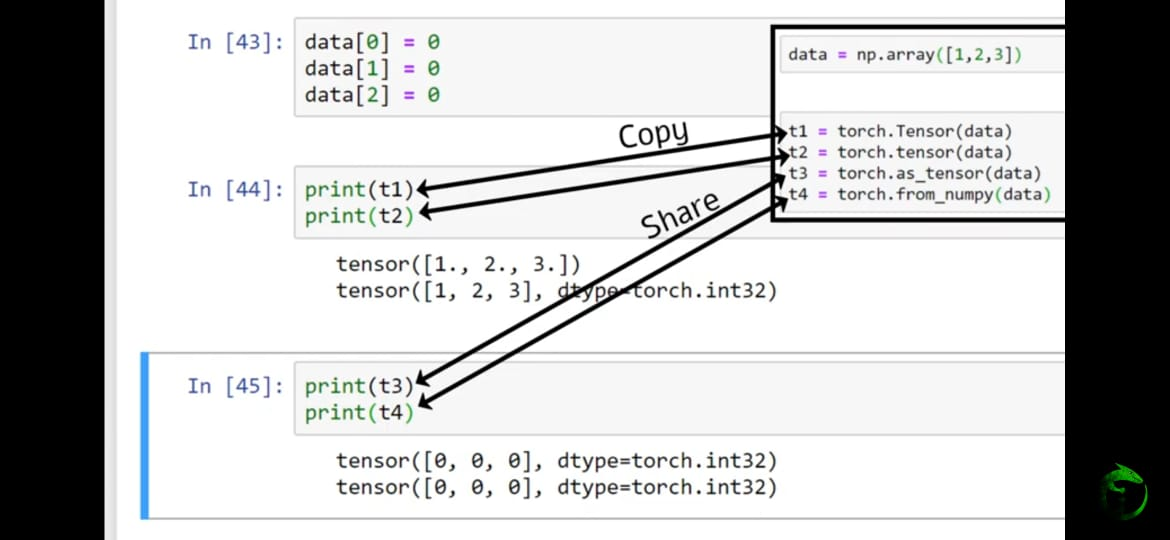

In [ ]:
print(t1)
print(t2)
# Contains the original Data values
# Data is Copied

tensor([1., 2., 3.])
tensor([1, 2, 3])


In [ ]:
print(t3)
print(t4)
# Contains the same data in the array after the change
# Data is Shared
# Zero memory copy, very efficient

tensor([0, 0, 0])
tensor([0, 0, 0])


In [ ]:
# Reshaping Operation
t = torch.tensor([
                  [1,1,1,1],
                  [2,2,2,2],
                  [3,3,3,3]
], dtype=torch.float32)

In [ ]:
t.size() #size method

torch.Size([3, 4])

In [ ]:
t.shape #shape attribute

torch.Size([3, 4])

In [ ]:
len(t.shape) # rank

2

In [ ]:
torch.tensor(t.shape).prod()
# no. of elements

tensor(12)

In [ ]:
t.numel()

12

In [ ]:
t.reshape(1,12)

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])

In [ ]:
t.reshape(2,6)

tensor([[1., 1., 1., 1., 2., 2.],
        [2., 2., 3., 3., 3., 3.]])

In [ ]:
t.reshape(3,4)

tensor([[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.]])

In [ ]:
t.reshape(2,2,3)
# changing rank to 3

tensor([[[1., 1., 1.],
         [1., 2., 2.]],

        [[2., 2., 3.],
         [3., 3., 3.]]])

In [ ]:
print(t.reshape(1,12).squeeze())
print(t.reshape(1,12).squeeze().shape)
# squeezing a tensor removes axes that have lenght of one

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])
torch.Size([12])


In [ ]:
print(t.reshape(1,12).squeeze().unsqueeze(dim=0))
print(t.reshape(1,12).squeeze().unsqueeze(dim=0).shape)
# unsqueezing a tensor adda dimension with a lenght of one

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
torch.Size([1, 12])


In [ ]:
def flatten(t):
  t = t.reshape(1,-1)
  t = t.squeeze()
  return t
# also equivalent to
# t.reshape(1,-1)[0]
# t.reshape(-1)
# t.flatten()

In [ ]:
flatten(t)

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])

In [ ]:
t1 = torch.tensor([
                   [1,1,1,1],
                   [1,1,1,1],
                   [1,1,1,1],
                   [1,1,1,1]
])

t2 = torch.tensor([
                   [2,2,2,2],
                   [2,2,2,2],
                   [2,2,2,2],
                   [2,2,2,2]
])

t3 = torch.tensor([
                   [3,3,3,3],
                   [3,3,3,3],
                   [3,3,3,3],
                   [3,3,3,3]
])

In [ ]:
t = torch.stack((t1,t2,t3))
t.shape

torch.Size([3, 4, 4])

In [ ]:
t

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2]],

        [[3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3]]])

In [ ]:
t = t.reshape(3,1,4,4)
t

tensor([[[[1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1]]],


        [[[2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2]]],


        [[[3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3]]]])

In [ ]:
# now to flatten only image and not the batch
t.flatten(start_dim=1)
# start_dim tells which axis it should start with when it begins flatten

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

In [ ]:
t.flatten(start_dim=1).shape

torch.Size([3, 16])

In [ ]:
t1 = torch.tensor([
                   [1,2],
                   [3,4]
], dtype=torch.float32)

t2 = torch.tensor([
                   [9,8],
                   [7,6]
], dtype=torch.float32)

In [ ]:
t1[0] # firstaxis

tensor([1., 2.])

In [ ]:
t1[0][0] #second axis

tensor(1.)

In [ ]:
t2[0][0]

tensor(9.)

# Two tensors must have same shape in order to perform Elementwise Operation

In [ ]:
#elementwise operation, and returns tensor of same shape
t1+t2

tensor([[10., 10.],
        [10., 10.]])

In [ ]:
print(t1 + 2)
# Broadcasting, the scaler value tensor is being broadcasted to the shape of t1
print(np.broadcast_to(2, t1.shape))

tensor([[3., 4.],
        [5., 6.]])
[[2 2]
 [2 2]]


In [ ]:
t1.add(2)

tensor([[3., 4.],
        [5., 6.]])

In [ ]:
t1 = torch.tensor([
                   [1,1],
                   [1,1]
], dtype=torch.float32)

t2 = torch.tensor([2,4], dtype=torch.float32)

In [ ]:
t1.shape

torch.Size([2, 2])

In [ ]:
t2.shape

torch.Size([2])

In [ ]:
t1 + t2  # Broadcasting !!

tensor([[3., 5.],
        [3., 5.]])

In [ ]:
t = torch.tensor([
                  [0,5,7],
                  [6,0,7],
                  [0,8,0]
], dtype=torch.float32)

In [ ]:
t.eq(0)

tensor([[ True, False, False],
        [False,  True, False],
        [ True, False,  True]])

In [ ]:
t.ge(0)

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [ ]:
t.gt(0)

tensor([[False,  True,  True],
        [ True, False,  True],
        [False,  True, False]])

In [ ]:
t.le(0)

tensor([[ True, False, False],
        [False,  True, False],
        [ True, False,  True]])

In [ ]:
t.lt(0)

tensor([[False, False, False],
        [False, False, False],
        [False, False, False]])

In [ ]:
t.abs()

tensor([[0., 5., 7.],
        [6., 0., 7.],
        [0., 8., 0.]])

In [ ]:
t.sqrt()

tensor([[0.0000, 2.2361, 2.6458],
        [2.4495, 0.0000, 2.6458],
        [0.0000, 2.8284, 0.0000]])

In [ ]:
t.neg()

tensor([[-0., -5., -7.],
        [-6., -0., -7.],
        [-0., -8., -0.]])

# A reduction operation on a tensor is anoperations that reduces the no. of elements contained within the tensor

In [ ]:
t.sum()

tensor(33.)

In [ ]:
t.numel()

9

In [ ]:
t.prod()

tensor(0.)

In [ ]:
t.mean()

tensor(3.6667)

In [ ]:
t.std()

tensor(3.5707)

In [ ]:
 t = torch.tensor([
                  [1,1,1,1],
                  [2,2,2,2],
                  [3,3,3,3]
], dtype=torch.float32)

In [ ]:
t.sum(dim=0)

tensor([6., 6., 6., 6.])

In [ ]:
t.sum(dim=1)

tensor([ 4.,  8., 12.])

In [ ]:
 t = torch.tensor([
                  [1,0,0,2],
                  [0,3,3,0],
                  [4,0,0,5]
], dtype=torch.float32)

In [ ]:
t.max()

tensor(5.)

In [ ]:
t.argmax()

tensor(11)

In [ ]:
t.flatten()
# 11th position gives the max

tensor([1., 0., 0., 2., 0., 3., 3., 0., 4., 0., 0., 5.])

In [ ]:
t.max(dim=0)

torch.return_types.max(values=tensor([4., 3., 3., 5.]), indices=tensor([2, 1, 1, 2]))

In [ ]:
t.argmax(dim=0)

tensor([2, 1, 1, 2])

In [ ]:
t.max(dim=1)

torch.return_types.max(values=tensor([2., 3., 5.]), indices=tensor([3, 1, 3]))

In [ ]:
# item method only works with scalar value tensors
print(t.mean())
print(t.mean().item())

tensor(1.5000)
1.5


In [ ]:
t.mean(dim=0).tolist()

[1.6666666269302368, 1.0, 1.0, 2.3333332538604736]

In [ ]:
t.mean(dim=0).numpy()

array([1.6666666, 1.       , 1.       , 2.3333333], dtype=float32)